In [102]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy
import scipy.spatial.distance as cd
from sklearn import linear_model
import seaborn as sns

In [160]:
train=pd.read_csv('train.csv', nrows=1000000)
test=pd.read_csv('test.csv')

In [166]:
train= train.dropna(how = 'any', axis = 'rows')

In [168]:
test= test.dropna(how = 'any', axis = 'rows')

In [169]:
combine=[train,test]

In [170]:
def distance(pickup_long, pickup_lat, dropoff_long,dropoff_lat):
    long_diff = abs(pickup_long - dropoff_long)
    lat_diff = abs(pickup_lat - dropoff_lat)
    if ((long_diff is None)|(lat_diff is None)):
        distance = 0
    else:
        distance = np.sqrt(long_diff**2+lat_diff**2)
    return distance

In [171]:
pickup_long = train['pickup_longitude'].values
pickup_lat = train['pickup_latitude'].values
dropoff_long = train['dropoff_longitude'].values
dropoff_lat = train['dropoff_latitude'].values

In [172]:
test_pickup_long = test['pickup_longitude'].values
test_pickup_lat = test['pickup_latitude'].values
test_dropoff_long = test['dropoff_longitude'].values
test_dropoff_lat = test['dropoff_latitude'].values

In [173]:
for dataset in combine:
    dataset['distance'] = pd.DataFrame(distance(pickup_long, pickup_lat, dropoff_long,dropoff_lat))

In [174]:
for  dataset in combine:
    date=[]
    for i in dataset['pickup_datetime']:
        i = i.split(' ')[0]
        date.append(i)
    dataset['date']=date

In [175]:
for  dataset in combine:
    year=[]
    for i in dataset['date']:
        i = i.split('-')[0]
        year.append(i)
    dataset['year']=year

In [176]:
for dataset in combine:
    month=[]
    for i in dataset['date']:
        i = i.split('-')[1]
        month.append(i)
    dataset['month']=month

In [177]:
for dataset in combine:
    time=[]
    for i in dataset['pickup_datetime']:
        i = i.split(' ')[1]
        time.append(i)
    dataset['time']=time

In [178]:
for dataset in combine:
    hour=[]
    for i in dataset['time']:
        i = i.split(':')[0]
        hour.append(i)
    dataset['hour']=hour

In [179]:
train['distance'].describe()

count    999980.000000
mean          0.231613
std          11.284541
min           0.000000
25%           0.012400
50%           0.021443
75%           0.038403
max        6933.843499
Name: distance, dtype: float64

In [131]:
test_distance_mean=test['long_diff'].dropna().mean()
test['long_diff']=test['long_diff'].fillna('test_distance_mean')

In [132]:
train_distance_mean=train['long_diff'].dropna().mean()
train['long_diff']=train['long_diff'].fillna('traindistance_mean')

In [182]:
for dataset in combine:
    dataset['long_diff']=abs(dataset['pickup_longitude']-dataset['dropoff_longitude'])
    dataset['lat_diff']=abs(dataset['pickup_latitude']-dataset['dropoff_latitude'])

In [183]:
for dataset in combine:
    dataset['hour']=dataset['hour'].astype('float')

In [184]:
for dataset in combine:
    dataset.loc[(dataset['hour']>=21) | (dataset['hour']<= 6), 'Period'] = 'midnight'
    dataset.loc[(dataset['hour']>=7) & (dataset['hour']<= 10), 'Period'] = 'morning_rush'
    dataset.loc[(dataset['hour']>=11) & (dataset['hour']<= 16), 'Period'] = 'slow'
    dataset.loc[(dataset['hour']>=17) & (dataset['hour']<= 20), 'Period'] = 'evening_rush'

In [185]:
for dataset in combine:
    dataset['midnight'] = dataset['Period'].map( {'midnight': 1, 'morning_rush': 0, 'slow': 0, 'evening_rush': 0} ).astype(int)
    dataset['morning_rush'] = dataset['Period'].map( {'midnight': 0, 'morning_rush': 1, 'slow': 0, 'evening_rush': 0} ).astype(int)
    dataset['slow'] = dataset['Period'].map( {'midnight': 0, 'morning_rush': 0, 'slow': 1, 'evening_rush': 0} ).astype(int)
    dataset['evening_rush'] = dataset['Period'].map( {'midnight': 0, 'morning_rush': 0, 'slow': 0, 'evening_rush': 1} ).astype(int)

In [186]:
train['distance'].describe()

count    999980.000000
mean          0.231613
std          11.284541
min           0.000000
25%           0.012400
50%           0.021443
75%           0.038403
max        6933.843499
Name: distance, dtype: float64

D:\Annaconda\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


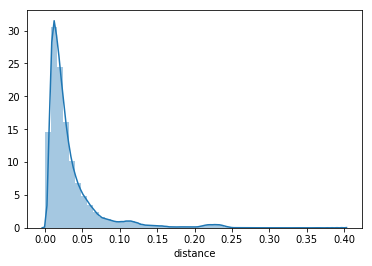

In [118]:
sns.distplot(train[train.distance<=0.4]['distance'])

In [187]:
for dataset in combine:
    dataset['distance']=dataset['distance'].astype('float')

In [188]:
for dataset in combine:
    dataset.loc[(dataset['distance']<=0.012), 'distance_type'] = '1_distance'
    dataset.loc[(dataset['distance']>0.012) & (dataset['distance']<=0.022), 'distance_type'] = '2_distance'
    dataset.loc[(dataset['distance']>0.022) & (dataset['distance']<=0.039), 'distance_type'] = '3_distance'
    dataset.loc[(dataset['distance']>0.039) & (dataset['distance']<= 0.1), 'distance_type'] = '4_distance'
    dataset.loc[(dataset['distance']>0.1) , 'distance_type'] = '5_distance'

In [189]:
for dataset in combine:
    dataset['1_distance'] = dataset['distance_type'].map( {'1_distance': 1, '2_distance': 0, '3_distance': 0, '4_distance': 0, '5_distance': 0} )
    dataset['2_distance'] = dataset['distance_type'].map( {'1_distance': 0, '2_distance': 1, '3_distance': 0, '4_distance': 0, '5_distance': 0} )
    dataset['3_distance'] = dataset['distance_type'].map( {'1_distance': 0, '2_distance': 0, '3_distance': 1, '4_distance': 0, '5_distance': 0} )
    dataset['4_distance'] = dataset['distance_type'].map( {'1_distance': 0, '2_distance': 0, '3_distance': 0, '4_distance': 1, '5_distance': 0} )
    dataset['5_distance'] = dataset['distance_type'].map( {'1_distance': 0, '2_distance': 0, '3_distance': 0, '4_distance': 0, '5_distance': 1} )

In [190]:
train['year'].head()

0    2009
1    2010
2    2011
3    2012
4    2010
Name: year, dtype: object

In [191]:
train['long_diff'].isnull().sum()

0

In [192]:
X_train = pd.DataFrame(train,columns=["passenger_count","long_diff","lat_diff","month","year","midnight","morning_rush","slow","evening_rush"]).values
Y_train = train['fare_amount'].values
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)
X_pred = pd.DataFrame(test,columns=["passenger_count","long_diff","lat_diff","month","year","midnight","morning_rush","slow","evening_rush"]).values
Y_pred = lm.predict(X_pred)

In [193]:
submission = pd.DataFrame(
    {'key': test['key'].values, 'fare_amount': Y_pred},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)